In [392]:
#XGBOOST BOSTON HOUSE PRICE PREDICTION


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [393]:
hp=sklearn.datasets.load_boston()
hpframe=pd.DataFrame(hp.data, columns=hp.feature_names)
#hpframe.head()

C:\Users\USER\anaconda3\envs\TFLOW\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [394]:
hpframe['price']=hp.target
#hpframe.head()

In [395]:
hpframe.shape

(506, 14)

In [396]:
#hpframe.isnull().sum()#finding missing values

In [397]:
#hpframe.describe()#statistical measures of dataset

<Figure size 1000x1000 with 0 Axes>

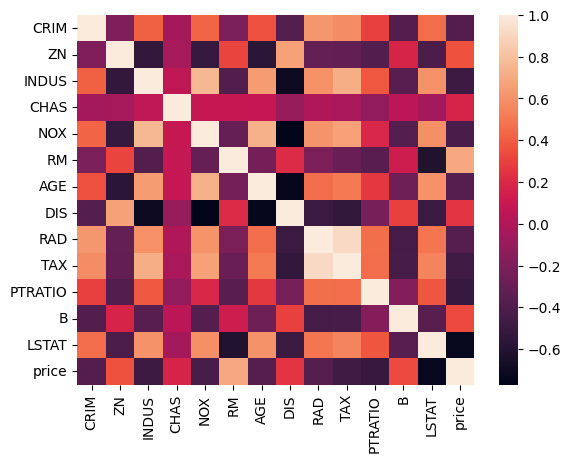

<Figure size 1000x1000 with 0 Axes>

In [404]:
#finding correlation between various features
#+ve corre or -ve corre

#correlation=hpframe.corr()
sns.heatmap(hpframe.corr())
#constructing heatmap to understand the correlation
plt.figure(figsize=(10,10))
#sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws{'size':8}, cmap='Blues')

In [399]:
X=hpframe.drop(['price'], axis=1)#dropping row, axis =0
y=hpframe['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 , random_state=100)
print(X.shape,X_train.shape,X_test.shape)
#print(y_test)


#model=linear_model.LinearRegression()
#model.fit(X_train,y_train)
#acc=model.score(X_test,y_test)
#print(acc)

(506, 13) (404, 13) (102, 13)


In [400]:
model=XGBRegressor()
model.fit(X_train,y_train)
acc=model.score(X_test,y_test)
print(acc)
prediction=model.predict(X_test)#prediction on test data
train_prediction=model.predict(X_train)#prediction on train data
#print(len(prediction))
#for i in range (len(prediction)):
#    print(prediction[i] )   



0.8814240990532957


In [401]:
#R squared error
score_1=metrics.r2_score(y_test,prediction)#finds variance between actual and predicted value

#mean absolute error,finds the mean of the difference between the actul and preducted value
score_2=metrics.mean_absolute_error(y_test,prediction)


print("R squared error : ", score_1)#this must be close to zero
print("mean absolute error: ",score_2)#must be close to zero

R squared error :  0.8814240990532957
mean absolute error:  2.329338567397174


In [402]:
#errors on train data
score_11=metrics.r2_score(y_train,train_prediction)
score_22=metrics.mean_absolute_error(y_train,train_prediction)
                         
print("R squared error : ", score_11)#this must be close to zero
print("mean absolute error: ",score_22)#must be close to zero

R squared error :  0.9999966195533171
mean absolute error:  0.011215312646167092


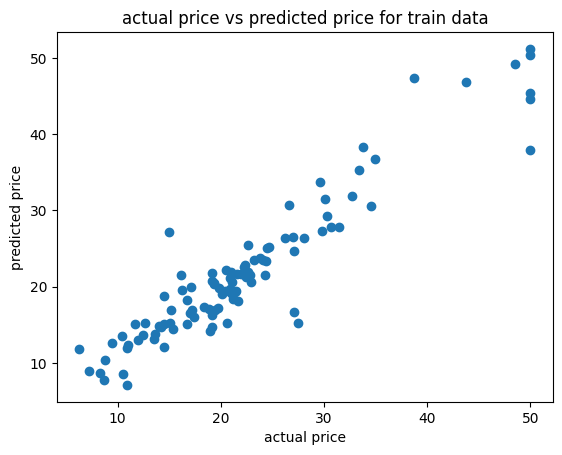

In [403]:
plt.scatter(y_test,prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price for train data")
plt.show()